1. Выборка - это подмножетсва данных из более крупного набора (популяции=генеральная совокупность)

2. Случайный отбор - это процесс при котором каждый доступный член популяции , подвергаемый отбору имеет равную возможность попасть в выборку при его извлечении

3. Качество данных имеет большее значение чем их количество когда создается модель или  выполняется оценка на основе выборке.Статистика добавляет сюда слово РЕПРЕЗЕНТАТИВНОСТЬ

4. Обычно x с чертной используется для среднего выборки, а "мю" для среднеего популяции

5. В типичной ситуации выборка извелкается с целью измерения чего-либо (при помощи выборочной статистики) либо моделирования чего-либо (при помощи статистической или автоматически аобущающийся модели)

6. Статистика - это числовая величина, описывающая выборку из популяции

          income        type
35162  67012.000        Data
14435  77000.000        Data
4990   58240.000        Data
37921  50000.000        Data
18404  33000.000        Data
...          ...         ...
995    66087.425  Mean of 40
996    70772.425  Mean of 40
997    62111.050  Mean of 40
998    71714.375  Mean of 40
999    71031.875  Mean of 40

[3000 rows x 2 columns]


/Users/tatanaternovaa/Documents/training-skills/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/f8/9r5znv851hdf_w4bqhp6c6bc0000gn/T/ipykernel_10194/421897139.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


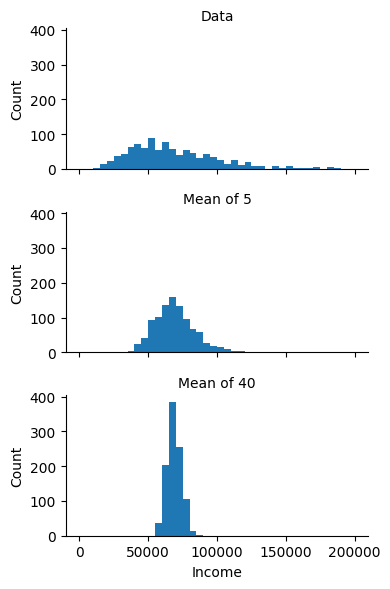

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

loans_income = pd.read_csv("LOANS_INCOME.CSV").squeeze("columns")

sample_data = pd.DataFrame(
    {
        "income": loans_income.sample(1000),
        "type": "Data",
    }
)

sample_mean_05 = pd.DataFrame(
    {
        "income": [loans_income.sample(5).mean() for _ in range(1000)],
        "type": "Mean of 5",
    }
)

sample_mean_20 = pd.DataFrame(
    {
        "income": [loans_income.sample(40).mean() for _ in range(1000)],
        "type": "Mean of 40",
    }
)

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

print(results)
g = sns.FacetGrid(results, col="type", col_wrap=1, height=2, aspect=2)
g.map(plt.hist, "income", range=[0, 200000], bins=40)
g.set_axis_labels("Income", "Count")
g.set_titles("{col_name}")

plt.tight_layout()
plt.show()

7. Центральная предельная теорема
Средние значения извлеченные из многочисленных выборок напоминают колоколообразную нормальную кривую даже если исходная популяция не является нормально распределенными

8. Стандартная ошибка - это оиночная метрика которая обощает вариабельность статистической величины.
Подход к измерению стандратной ошибки:
1) собрать ряд новых выборок из популяции
2) по каждой выборке вычислить статистику (например среднеее)
3) вычислить стандратное отклонение статистики вычисленной на шаге 2 и использовать ее в качестве стандратной ошибки

СТАНДАРТНАЯ ОШИБКА ПОКАЗЫВАЕТ вариабельность выборочной метрики
СТАНДАРТНОЕ ОТКЛОНЕНИЕ ПОКАЗЫВАЕТ вариабельность отедльных точек данных
